#### Author: Jens Liebehenschel (2021)
#### Frankfurt University of Applied Sciences, FB2, Computer Science
#### For educational purposes only and not necessarily very pythonic
## Sorting an array using quicksort and visualize the single steps
#### Based on Cormen et. al.: Introduction to Algorithms
## For execution of complete code click on "Kernel", then on "Restart & Run All"
## At the end of your experiments click on "File", then on "Close and Halt"

In [1]:
# required for keeping track of the changes in steps
import copy

In [2]:
# sorting main function to be called
def sort(a):
    global steps, index_last_complete_step
    steps=[]
    index_last_complete_step=0

    # nothing yet sorted
    steps.append([[], [], [[0,len(a)-1]], [], [], a[:]])
    quicksort(a, 0, len(a)-1)
    # sorting completed
    steps.append([[[0,len(a)-1]], [], [], [], [], a[:]])

    return a

In [3]:
def quicksort(a, p, r):
    global steps, index_last_complete_step
    if p < r:
        q = partition(a, p, r)
        
        step = copy.deepcopy(steps[index_last_complete_step])
        index_last_complete_step = len(steps)
        step[-1] = a[:]
        step[0].append([q,q])
        step[1].append([p,q-1])
        step[1].append([q+1,r])
        steps.append(step)
        
        quicksort(a, p, q-1)

        if (p < q-1):
            step = copy.deepcopy(steps[index_last_complete_step])
            index_last_complete_step = len(steps)
            step[-1] = a[:]
            step[0].append([p,q-1])
            steps.append(step)
            print(index_last_complete_step, ":", p, q-1)
        
        quicksort(a, q+1, r)

        if (q+1 < r):
            step = copy.deepcopy(steps[index_last_complete_step])
            index_last_complete_step = len(steps)
            step[-1] = a[:]
            step[0].append([q+1,r])
            steps.append(step)
            print(index_last_complete_step, ":", q+1,r)

    return a

In [4]:
def partition(a, p, r):
    global steps
    # pivot element is the element at right side of part to be sorted
    x = a[r]
    i = p-1
    for j in range(p, r):
        steps.append([[], [], [], [j,r], [], a[:]])
        if a[j] <= x:
            i = i+1
            a[i], a[j] = a[j], a[i]
            steps.append([[], [], [], [], [i,j], a[:]])
    a[i+1], a[r] = a[r], a[i+1]
    steps.append([[], [], [], [], [i+1,r], a[:]])
    # return position of pivot element
    return i+1

## Constants

In [5]:
# change output colors here
COL_SORTED = 'mediumseagreen'
COL_PART_SORTED = 'yellowgreen'
COL_UNSORTED = 'tomato'
COL_COMPARISON = 'skyblue'
COL_ASSIGNMENT = 'sandybrown'
COL_SEP_GRAPH = 'bo-' # includes also style
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

## Helper functions

In [6]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

def plot_interval(x, y_vals, col, thick_lines = True):
#    if len(y_vals) == 1 and len(y_vals[0]) == 2:
    for y in y_vals:
        if thick_lines:
            plt.plot([x,x],[y[0]-OFFSET, y[1]+OFFSET], col, linewidth=8, solid_capstyle="butt")
        else:
            plt.plot([x,x],[y[0]-OFFSET, y[1]+OFFSET], col)

## Output graphical view

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(ARRAY_SIZE):
    global steps

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, ARRAY_SIZE, max(1,ARRAY_SIZE//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, ARRAY_SIZE])
    #plt.axis('off')
    plt.xlabel("Sorting steps")
    plt.ylabel("Indexes of array to be sorted")

    # output graph based on collected data
    for i, step in enumerate(steps):
        if len(step[3]) == 0 and len(step[4]) == 0:
            # unsorted
            plot_interval(i, step[2], COL_UNSORTED)
            # partially sorted
            plot_interval(i, step[1], COL_PART_SORTED)
            # sorted
            plot_interval(i, step[0], COL_SORTED)
            # plot complete array content
            plot_values(i,list(range(ARRAY_SIZE)),step[5])

        elif output_compared_elements and len(step[3]) > 0:
            minimum = min(step[3])
            maximum = max(step[3])
            # compared elements
            plot_interval(i, [[minimum, minimum]], COL_COMPARISON)
            plot_interval(i, [[maximum, maximum]], COL_COMPARISON)
            # line between both elements
            if maximum-minimum > 1:
                plot_interval(i, [[minimum+1, maximum-1]], COL_COMPARISON, thick_lines = False)
            # compared keys
            plot_values(i,[minimum,maximum],step[5])

        elif output_assigned_elements and len(step[4]) > 0:
            minimum = min(step[4])
            maximum = max(step[4])
            # assigned elements
            plot_interval(i, [[minimum, minimum]], COL_ASSIGNMENT)
            plot_interval(i, [[maximum, maximum]], COL_ASSIGNMENT)
            # line between both elements
            if maximum-minimum > 1:
                plot_interval(i, [[minimum+1, maximum-1]], COL_ASSIGNMENT, thick_lines = False)
            # assigned keys
            plot_values(i,[minimum, maximum],step[5])
        
    # draw horitontal lines
    for i in range(ARRAY_SIZE+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
   
    # show plot
    plt.show()

## Global variables for easier information exchange between sorting and output functions

In [8]:
# steps contains the data for visualization of the single steps
# steps: [[sorted interval], [partially sorted interval], [unsorted interval], 
#         [compared elements], [assigned elements], [array]]
# [sorted, partially sorted, unsorted]: [from,to], ... (with from <= to)
# [compared elements]: two indexes in a list
# [exchanged elements]: one (key assignment) or two indexes (key exchange) in a list
# [array]: copy of array in current state
steps=[]
index_last_complete_step=0

## Configuration data for elements in output 

In [9]:
# change output settings here
output_compared_elements = False
output_compared_elements = True
output_assigned_elements = False
output_assigned_elements = True

## Size of predefined sorting tests

In [10]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10

## Legend for output

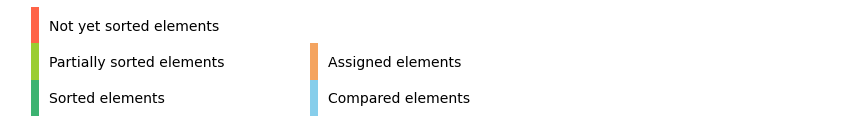

In [11]:
COLORS = [[COL_SORTED,"Sorted elements"], [COL_PART_SORTED,"Partially sorted elements"], [COL_UNSORTED,"Not yet sorted elements"],
          [COL_COMPARISON,"Compared elements"], [COL_ASSIGNMENT,"Assigned elements"]]
plt.figure(figsize=(15, 2))
plt.axis([0, 30, 0, 3])
plt.axis('off')
for i in range(3):
    plot_interval(1, [[i+OFFSET,i+OFFSET]], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
for i in range(2):
    plot_interval(11, [[i+OFFSET,i+OFFSET]], COLORS[i+3][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i+3][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=14)
plt.show()

## Generate test data and test sorting algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
109 : 0 1
110 : 0 2
111 : 0 3
112 : 0 4
113 : 0 5
114 : 0 6
115 : 0 7
116 : 0 8
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


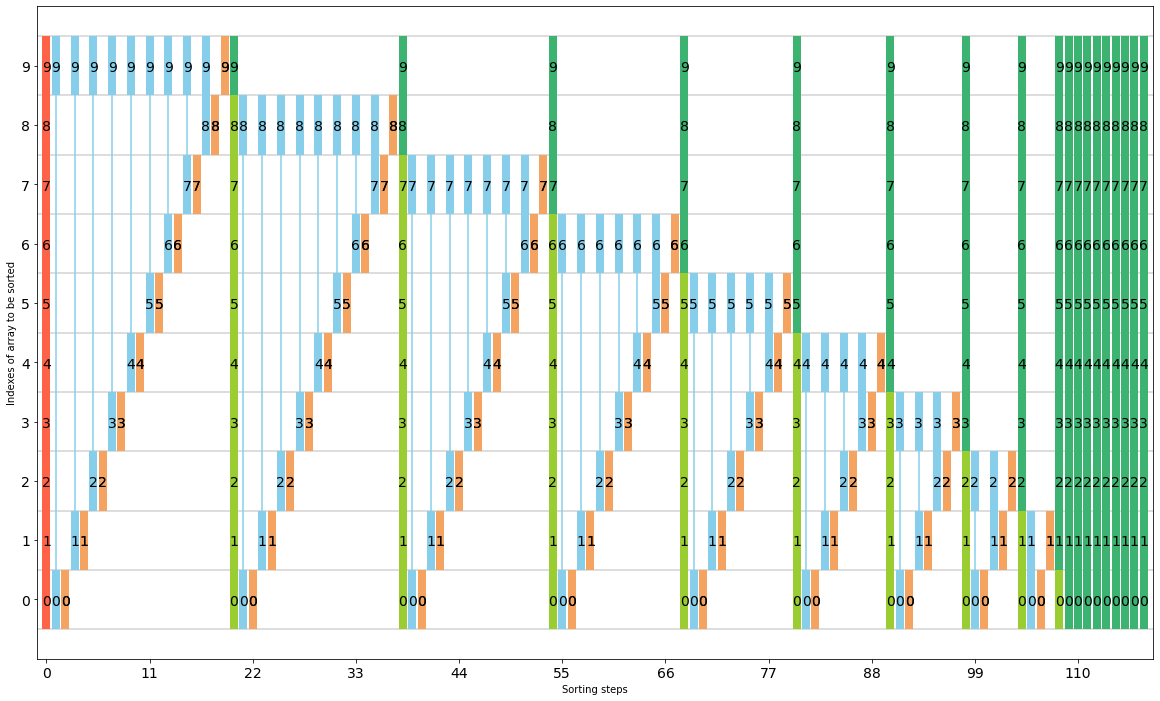

In [12]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, sort(sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
84 : 4 5
85 : 4 6
86 : 3 6
87 : 3 7
88 : 2 7
89 : 2 8
90 : 1 8
91 : 1 9
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


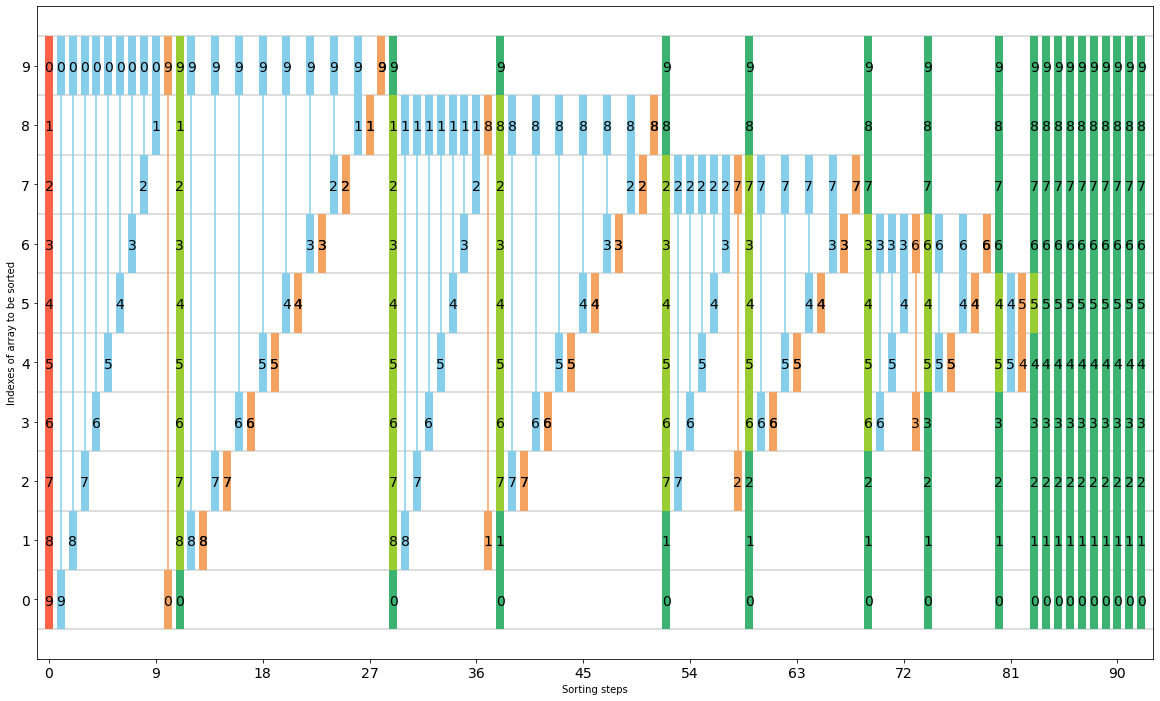

In [13]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, sort(reverse_sorted_array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
33 : 3 4
34 : 1 4
35 : 0 4
49 : 8 9
50 : 7 9
51 : 6 9
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


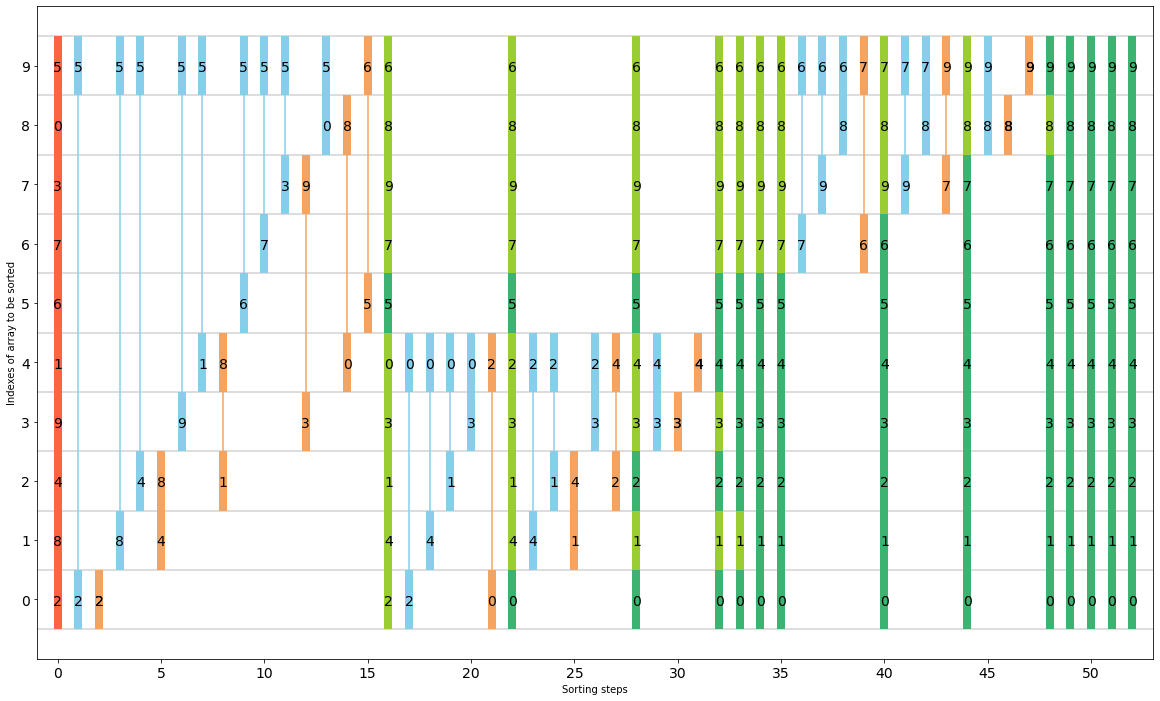

In [14]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array))
output_graphical_view(ARRAY_SIZE)

Before sorting: [1, 3, 2, 0]
14 : 2 3
15 : 1 3
After  sorting: [0, 1, 2, 3]


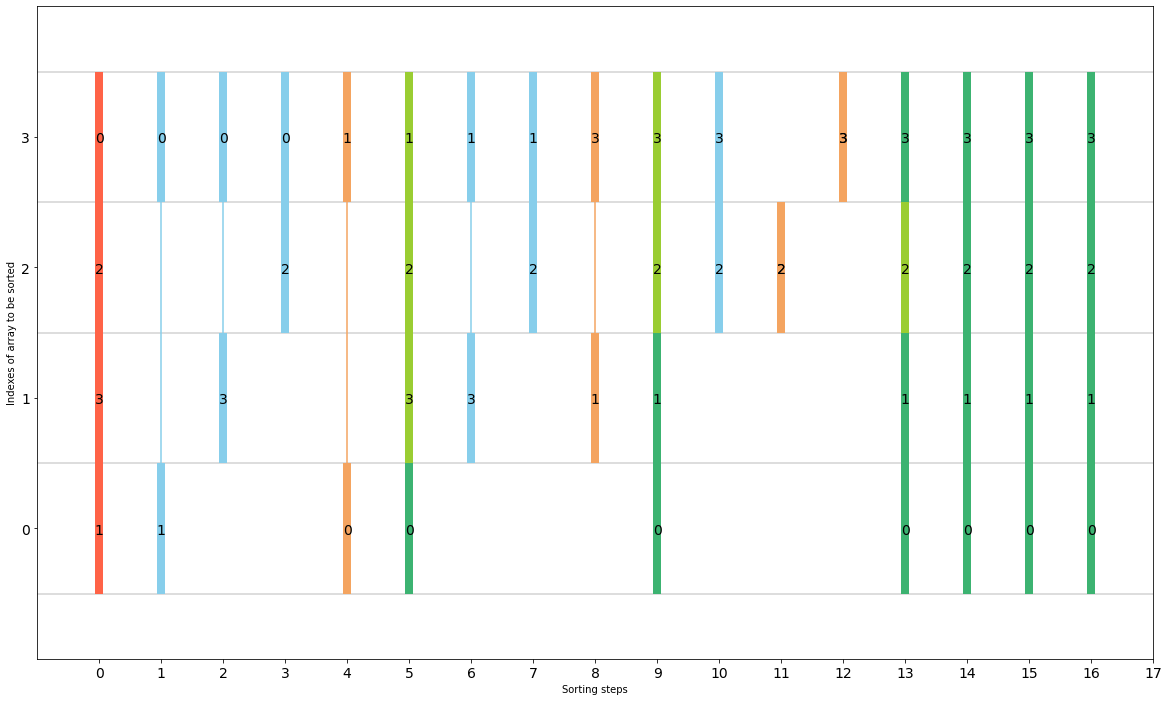

In [15]:
# your test here ...
array = [1,3,2,0]
ARRAY_SIZE = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, sort(array))
output_graphical_view(ARRAY_SIZE)

In [16]:
# ... and here ...
